# Financial Planning with APIs and Simulations
This project consists of two financial analysis tools to help people become more prepared for the future.

The first part of the project is a tool that uses current pricing data to determine if a credit union member's current investments are enough to cover a potential emergency. The second part is a series of simulations and calculations to help the member plan for retirement. Both of these tools use APIs in order to retrieve the most current data to assess.

In [111]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [112]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Financial Planner for Emergencies

It is important to have money saved in case of an emergency. This section will analyze a portfolio made up of cryptocurrencies, stocks, and bonds to determine if the value of all of the assets combined is enough to cover at least 3 months of potential lost income for the user.

### Step 1: Retrieve pricing data for the coins in the portfolio

In [113]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

Set the variable for the member's monthly household income

In [114]:
# The monthly amount for the member's household income
monthly_income = 12000

Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [115]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [116]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19132175,
            "id": 1,
            "last_updated": 1661479452,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 412285467880,
                    "percent_change_1h": 0.108112096463858,
                    "percent_change_24h": -0.156703908402737,
                    "percent_change_7d": -7.2854761473299,
                    "percentage_change_1h": 0.108112096463858,
                    "percentage_change_24h": -0.156703908402737,
                    "percentage_change_7d": -7.2854761473299,
                    "price": 21555.0,
                    "volume_24h": 26954221766
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19132175,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [117]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 120252023,
            "id": 1027,
            "last_updated": 1661479441,
            "max_supply": 120252023,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 202540477090,
                    "percent_change_1h": 0.220750847373782,
                    "percent_change_24h": 0.3798595673076,
                    "percent_change_7d": -8.93844174041998,
                    "percentage_change_1h": 0.220750847373782,
                    "percentage_change_24h": 0.3798595673076,
                    "percentage_change_7d": -8.93844174041998,
                    "price": 1684.74,
                    "volume_24h": 12959148163
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120252023,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_crypto

Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [118]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


21555.0


In [119]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


1684.74


### Step 2: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [120]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


25866.0


In [121]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)


8929.122


In [122]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


34795.122


### Step 3: Retrieve pricing data for the stocks and bonds in the portfolio

Review the total number of shares held in both (SPY) and (AGG).

In [123]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


Create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object.

In [124]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')


Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday.


In [125]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp('2022-08-24', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-24', tz='America/New_York').isoformat()

Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [126]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


SPY                                      \
                            open      high     low   close    volume   
timestamp                                                              
2022-08-24 04:00:00+00:00  412.1  415.1101  411.39  413.67  48983049   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2022-08-24 04:00:00+00:00      334281  413.383226  101.35  101.395  101.15   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-24 04:00:00+00:00  101.24  5397673       19881  101.259133

Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [127]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df['AGG']['close']

# Print the AGG closing price
print(agg_close_price)


timestamp
2022-08-24 04:00:00+00:00    101.24
Name: close, dtype: float64


In [128]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df['SPY']['close']

# Print the SPY closing price
print(spy_close_price)


timestamp
2022-08-24 04:00:00+00:00    413.67
Name: close, dtype: float64


### Step 4: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [129]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(agg_value)


timestamp
2022-08-24 04:00:00+00:00    20248.0
Name: close, dtype: float64


In [130]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(spy_value)


timestamp
2022-08-24 04:00:00+00:00    45503.7
Name: close, dtype: float64


In [131]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = float(agg_value + spy_value)

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


65751.70000000001


In [132]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current total portfolio value
print(total_portfolio)


100546.82200000001


### Step 5: Evaluate the Emergency Fund

Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [133]:
# Consolidate financial assets data into a Python list
savings_data = [total_stocks_bonds, total_crypto_wallet]

# Review the Python list savings_data
savings_data
    

[65751.70000000001, 34795.122]

Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [134]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data)
columns = ['amount']
index = ['stock/bond', 'crypto']
# Display the savings_df DataFrame
savings_df.columns=columns
savings_df.index=index
savings_df

,amount
stock/bond,65751.700
crypto,34795.122


Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - 2022-08-24'}, ylabel='amount'>

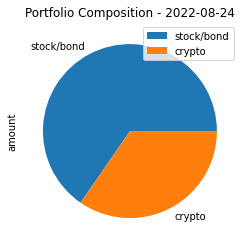

In [135]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - 2022-08-24')

#### Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income.

Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000.

In [136]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [137]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money in your emergency fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations on reaching the goal of creating an emergency fund!')
else:
    print(f'You need {emergency_fund_value - total_portfolio} more dollars to reach your goal.')


Congratulations! You have enough money in your emergency fund!


## Part 2: Create a Financial Planner for Retirement
Deciding when to retire is a significant life decision. As such, it is important to start planning for retirement early. This tool allows the user to simulate possible outcomes of different retirement portfolios over various time periods in order to determine when it would be possible to retire.

### Step 1: Retrieve historical data for the two stocks in the member's portfolio to use as input for the simulation

Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [138]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_3_year = pd.Timestamp('2019-08-24', tz='America/New_York').isoformat()

In [139]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_3_year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_3_year,
    end=end_date
).df

# Reorganize the DataFrame
SPY_3_year = prices_3_year[prices_3_year['symbol']=='SPY'].drop('symbol', axis=1)
AGG_3_year = prices_3_year[prices_3_year['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
prices_3_year = pd.concat([SPY_3_year, AGG_3_year], axis=1, keys=['SPY', 'AGG'])

# Display both the first and last five rows of the DataFrame
display(prices_3_year.head())
display(prices_3_year.tail())


SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-26 04:00:00+00:00  287.24  288.0000  285.58  288.00  72674040   
2019-08-27 04:00:00+00:00  289.55  289.9500  286.03  286.87  68307923   
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2019-08-26 04:00:00+00:00      348875  286.979104  113.84  113.95  113.670   
2019-08-27 04:00:00+00:00      346860  287.694466  113.91  114.12  113.870   
2019-08-28 04:00:00+00:00      311534  287.877722  114.30  114.30  114.040   
2019-08-29 04:00:00+00:00      309986  292.211021  114.08  114.08  113.835   
2019-08-30 04:00:00+00:00      303476  292.713824  113.90  114.15  113.890   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-08-26 04:00:00+00:00  113.73  5128260       15135  113.784547  
2019-08-27 04:00:00+00:00  114.09  3473405        9933  114.062880  
2019-08-28 04:00:00+00:00  114.10  5102472       15819  114.130072  
2019-08-29 04:00:00+00:00  114.03  2670969       11548  113.955831  
2019-08-30 04:00:00+00:00  114.13  4661629       11279  114.025187

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2022-08-18 04:00:00+00:00  426.78  428.6100  425.50  427.89  47948507   
2022-08-19 04:00:00+00:00  424.87  425.2600  421.22  422.14  67861630   
2022-08-22 04:00:00+00:00  417.04  417.2300  412.40  413.35  77604197   
2022-08-23 04:00:00+00:00  412.96  415.4200  411.77  412.35  48952606   
2022-08-24 04:00:00+00:00  412.10  415.1101  411.39  413.67  48983049   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-08-18 04:00:00+00:00      331980  427.137042  102.70  102.9300  102.640   
2022-08-19 04:00:00+00:00      438953  423.097019  102.13  102.1300  101.845   
2022-08-22 04:00:00+00:00      484052  415.048519  101.82  101.8900  101.515   
2022-08-23 04:00:00+00:00      389397  413.095826  101.54  101.9671  101.400   
2022-08-24 04:00:00+00:00      334281  413.383226  101.35  101.3950  101.150   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-18 04:00:00+00:00  102.71  3838685       15666  102.773638  
2022-08-19 04:00:00+00:00  101.99  4567988       14353  101.981855  
2022-08-22 04:00:00+00:00  101.55  7132742       24710  101.702316  
2022-08-23 04:00:00+00:00  101.51  6531916       21473  101.686417  
2022-08-24 04:00:00+00:00  101.24  5397673       19881  101.259133

### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [161]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_30_year = MCSimulation(
    portfolio_data = prices_3_year,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30)

# Review the simulation input data
display(MC_30_year.portfolio_data.head())
display(MC_30_year.portfolio_data.tail())

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-26 04:00:00+00:00  287.24  288.0000  285.58  288.00  72674040   
2019-08-27 04:00:00+00:00  289.55  289.9500  286.03  286.87  68307923   
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-26 04:00:00+00:00      348875  286.979104          NaN  113.84   
2019-08-27 04:00:00+00:00      346860  287.694466    -0.003924  113.91   
2019-08-28 04:00:00+00:00      311534  287.877722     0.007042  114.30   
2019-08-29 04:00:00+00:00      309986  292.211021     0.012773  114.08   
2019-08-30 04:00:00+00:00      303476  292.713824    -0.000444  113.90   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2019-08-26 04:00:00+00:00  113.95  113.670  113.73  5128260       15135   
2019-08-27 04:00:00+00:00  114.12  113.870  114.09  3473405        9933   
2019-08-28 04:00:00+00:00  114.30  114.040  114.10  5102472       15819   
2019-08-29 04:00:00+00:00  114.08  113.835  114.03  2670969       11548   
2019-08-30 04:00:00+00:00  114.15  113.890  114.13  4661629       11279   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-26 04:00:00+00:00  113.784547          NaN  
2019-08-27 04:00:00+00:00  114.062880     0.003165  
2019-08-28 04:00:00+00:00  114.130072     0.000088  
2019-08-29 04:00:00+00:00  113.955831    -0.000613  
2019-08-30 04:00:00+00:00  114.025187     0.000877

SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2022-08-18 04:00:00+00:00  426.78  428.6100  425.50  427.89  47948507   
2022-08-19 04:00:00+00:00  424.87  425.2600  421.22  422.14  67861630   
2022-08-22 04:00:00+00:00  417.04  417.2300  412.40  413.35  77604197   
2022-08-23 04:00:00+00:00  412.96  415.4200  411.77  412.35  48952606   
2022-08-24 04:00:00+00:00  412.10  415.1101  411.39  413.67  48983049   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-08-18 04:00:00+00:00      331980  427.137042     0.002906  102.70   
2022-08-19 04:00:00+00:00      438953  423.097019    -0.013438  102.13   
2022-08-22 04:00:00+00:00      484052  415.048519    -0.020822  101.82   
2022-08-23 04:00:00+00:00      389397  413.095826    -0.002419  101.54   
2022-08-24 04:00:00+00:00      334281  413.383226     0.003201  101.35   

                                                                           \
                               high      low   close   volume trade_count   
timestamp                                                                   
2022-08-18 04:00:00+00:00  102.9300  102.640  102.71  3838685       15666   
2022-08-19 04:00:00+00:00  102.1300  101.845  101.99  4567988       14353   
2022-08-22 04:00:00+00:00  101.8900  101.515  101.55  7132742       24710   
2022-08-23 04:00:00+00:00  101.9671  101.400  101.51  6531916       21473   
2022-08-24 04:00:00+00:00  101.3950  101.150  101.24  5397673       19881   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-08-18 04:00:00+00:00  102.773638     0.002147  
2022-08-19 04:00:00+00:00  101.981855    -0.007010  
2022-08-22 04:00:00+00:00  101.702316    -0.004314  
2022-08-23 04:00:00+00:00  101.686417    -0.000394  
2022-08-24 04:00:00+00:00  101.259133    -0.002660

In [141]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lydia\OneDrive\Boot_camp\Challenges\Module_5_challenge\financial-planning-tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000939,1.001996,0.990024,0.988981,0.995959,1.011374,1.002826,1.008129,1.003483,0.992986,...,1.011646,1.002076,0.993724,0.994172,1.014567,1.002114,0.987840,0.993475,1.008004,1.006271
2,1.017116,1.000734,1.008708,0.994317,0.986802,0.998561,1.004789,1.000979,1.014878,1.017700,...,1.017446,1.011203,1.003023,0.996057,1.013958,0.992687,0.979703,0.976583,1.002812,1.014243
3,1.003765,0.989707,1.008228,0.998832,1.005538,0.990699,1.003994,1.000043,1.023199,1.013645,...,1.022430,1.014517,0.992799,1.015883,1.018622,0.986916,0.981109,0.973216,1.020675,1.026741
4,1.002400,1.010673,1.009112,0.996843,0.993875,0.979376,1.004989,0.989923,1.032101,1.023299,...,1.018145,1.010699,0.976532,1.022373,1.013372,0.993343,0.989059,0.984920,1.027885,1.019095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.212991,4.123166,7.545254,8.264859,9.487125,4.004127,7.652438,2.371272,3.290505,10.777294,...,23.085062,17.987647,1.534218,6.091957,7.246402,5.395384,3.637585,12.146481,10.570887,17.949305
7557,11.220753,4.093042,7.576004,8.163286,9.662699,4.053683,7.709164,2.313072,3.321218,10.845129,...,23.030925,17.919767,1.542445,6.135225,7.244886,5.507559,3.595751,12.054279,10.786164,18.012020
7558,11.025577,4.108956,7.439519,8.167526,9.651752,4.072422,7.801097,2.253219,3.310363,10.865819,...,23.554633,17.976170,1.528259,6.127424,7.196640,5.499709,3.573137,11.992654,10.773014,17.876493
7559,11.116017,4.117022,7.250849,8.243066,9.627737,4.123215,7.827312,2.261307,3.349934,10.800156,...,23.041721,17.749356,1.519703,6.204031,7.191961,5.494640,3.617553,11.985096,10.757726,18.175701


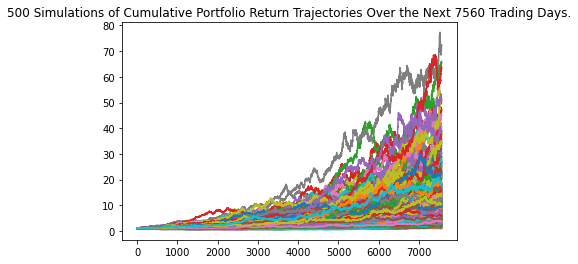

In [142]:
# Visualize the 30-year Monte Carlo simulation by creating an
MC_30_sim_line_plot = MC_30_year.plot_simulation()

Plot the probability distribution of the Monte Carlo simulation.

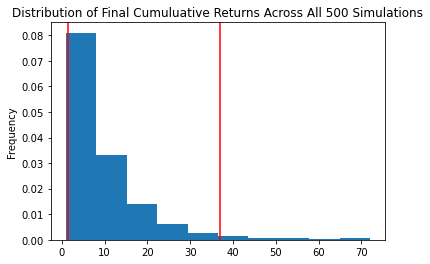

In [143]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_30_sim_dist_plot = MC_30_year.plot_distribution()

### Step 3: Generate the summary statistics for the Monte Carlo simulation.

In [144]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_30_summary_statistics = MC_30_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
MC_30_summary_statistics

count           500.000000
mean             10.062615
std               9.544216
min               0.938664
25%               4.108190
50%               7.061660
75%              12.708261
max              72.062094
95% CI Lower      1.528773
95% CI Upper     37.056633
Name: 7560, dtype: float64

### Step 4: Analyze the Retirement Portfolio Forecasts
To calculate the starting portfolio value, we will use the 310 total shares that the member has and adjust the number of shares for each asset to reflect the 60/40 distribution.

In [166]:
# Print the current balance of the stock and bond portion of the members portfolio
total_shares = 310
spy_shares_30 = total_shares * .6
agg_shares_30 = total_shares * .4
spy_value_30 = float(spy_shares_30 * spy_close_price)
agg_value_30 = float(agg_shares_30 * agg_close_price)
total_30_portfolio_value = spy_value_30 + agg_value_30
total_30_portfolio_value

89496.38

In [168]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_30_cumulative_return = MC_30_summary_statistics[8] * total_30_portfolio_value
ci_upper_30_cumulative_return = MC_30_summary_statistics[9] * total_30_portfolio_value

# Print the result of your calculations
print(f"Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of ${total_30_portfolio_value:.2f} "
f"with a 60/40 stock/bond distribution over the next 30 years will end within a range of ${ci_lower_30_cumulative_return:.2f} and ${ci_upper_30_cumulative_return:.2f}.")


Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of $89496.38 with a 60/40 stock/bond distribution over the next 30 years will end within a range of $136819.61 and $3316434.55.


## Step 5: Forecast Cumulative Returns in 10 Years
Adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

In [147]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_10_year = MCSimulation(
    portfolio_data = prices_3_year,
    weights = [.8,.2],
    num_simulation = 500,
    num_trading_days = 252*10)

# Review the simulation input data
MC_10_year.portfolio_data.head()



SPY                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-08-26 04:00:00+00:00  287.24  288.0000  285.58  288.00  72674040   
2019-08-27 04:00:00+00:00  289.55  289.9500  286.03  286.87  68307923   
2019-08-28 04:00:00+00:00  286.10  289.0700  285.25  288.89  60200590   
2019-08-29 04:00:00+00:00  291.77  293.1600  290.61  292.58  58018751   
2019-08-30 04:00:00+00:00  294.21  294.2399  291.42  292.45  63024780   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-08-26 04:00:00+00:00      348875  286.979104          NaN  113.84   
2019-08-27 04:00:00+00:00      346860  287.694466    -0.003924  113.91   
2019-08-28 04:00:00+00:00      311534  287.877722     0.007042  114.30   
2019-08-29 04:00:00+00:00      309986  292.211021     0.012773  114.08   
2019-08-30 04:00:00+00:00      303476  292.713824    -0.000444  113.90   

                                                                         \
                             high      low   close   volume trade_count   
timestamp                                                                 
2019-08-26 04:00:00+00:00  113.95  113.670  113.73  5128260       15135   
2019-08-27 04:00:00+00:00  114.12  113.870  114.09  3473405        9933   
2019-08-28 04:00:00+00:00  114.30  114.040  114.10  5102472       15819   
2019-08-29 04:00:00+00:00  114.08  113.835  114.03  2670969       11548   
2019-08-30 04:00:00+00:00  114.15  113.890  114.13  4661629       11279   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-08-26 04:00:00+00:00  113.784547          NaN  
2019-08-27 04:00:00+00:00  114.062880     0.003165  
2019-08-28 04:00:00+00:00  114.130072     0.000088  
2019-08-29 04:00:00+00:00  113.955831    -0.000613  
2019-08-30 04:00:00+00:00  114.025187     0.000877

In [148]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\lydia\OneDrive\Boot_camp\Challenges\Module_5_challenge\financial-planning-tools\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014072,0.983011,0.995779,0.980442,0.998069,1.006646,1.000259,1.005248,0.988902,0.998628,...,0.984395,1.004727,0.981548,1.013171,0.997813,1.011306,0.976796,0.998213,0.998877,1.006113
2,0.988247,0.993829,0.978470,1.002620,1.007852,1.008008,1.016403,1.010141,0.979861,0.997554,...,0.962829,1.025245,0.963535,1.022296,1.010327,1.029602,0.976055,0.997680,0.998279,0.994003
3,0.993158,1.011933,1.012555,1.004859,1.019240,1.014026,1.013776,0.995498,0.994387,0.988911,...,0.945193,1.029697,0.991097,1.022515,0.976933,1.031639,0.987230,0.992610,0.982981,1.013025
4,0.979875,0.998738,1.019447,0.992502,1.031804,1.006390,1.010415,0.997059,1.008021,1.000584,...,0.935584,1.060026,0.991668,1.043887,0.978847,1.021192,0.979106,1.006716,0.984117,1.006605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.346291,1.766292,4.650988,2.659981,0.550227,2.103993,6.030982,1.852286,9.970521,3.568384,...,2.144175,1.980240,3.456685,1.984750,1.459567,4.832649,2.171981,4.424020,1.970744,5.449883
2517,3.285571,1.769782,4.522686,2.667751,0.543091,2.105094,6.031827,1.855512,10.009774,3.582704,...,2.182364,2.005260,3.490639,1.936919,1.453277,4.850466,2.159938,4.429233,1.970275,5.410399
2518,3.277134,1.779020,4.564119,2.626537,0.551774,2.033918,6.084456,1.843761,10.016819,3.531356,...,2.222636,2.020371,3.486738,1.977835,1.446758,4.783759,2.148887,4.397207,1.976263,5.415797
2519,3.269315,1.751516,4.653620,2.628202,0.551663,2.075590,6.200863,1.874059,9.877062,3.550400,...,2.237356,1.982642,3.469741,2.025989,1.465829,4.799030,2.187020,4.391155,1.967804,5.422583


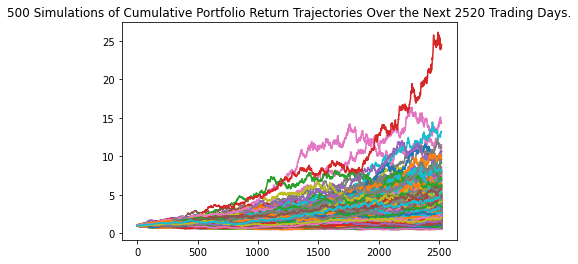

In [149]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_10_sim_line_plot = MC_10_year.plot_simulation()


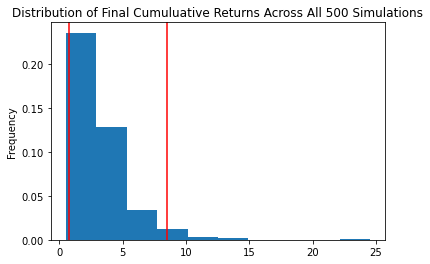

In [150]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_10_sim_dist_plot = MC_10_year.plot_distribution()


In [151]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_summary_statistics = MC_10_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
MC_10_summary_statistics

count           500.000000
mean              3.166158
std               2.270535
min               0.504039
25%               1.702417
50%               2.662228
75%               3.856522
max              24.532705
95% CI Lower      0.723308
95% CI Upper      8.512822
Name: 2520, dtype: float64

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [170]:
# Print the current balance of the stock and bond portion of the members portfolio
total_shares = 310
spy_shares_10 = total_shares * .8
agg_shares_10 = total_shares * .2
spy_value_10 = float(spy_shares_10 * spy_close_price)
agg_value_10 = float(agg_shares_10 * agg_close_price)
total_10_portfolio_value = spy_value_10 + agg_value_10
total_10_portfolio_value


108867.04000000001

In [172]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_10_cumulative_return = MC_10_summary_statistics[8] * total_10_portfolio_value
ci_upper_10_cumulative_return = MC_10_summary_statistics[9] * total_10_portfolio_value

# Print the result of your calculations
print(f"Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of ${total_10_portfolio_value:.2f} "
f"with an 80/20 stock/bond distribution over the next 10 years will end within a range of ${ci_lower_10_cumulative_return:.2f} and ${ci_upper_10_cumulative_return:.2f}.")


Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of $108867.04 with an 80/20 stock/bond distribution over the next 10 years will end within a range of $78744.42 and $926765.68.


In [173]:
print(f"Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of ${total_30_portfolio_value:.2f} "
f"with a 60/40 stock/bond distribution over the next 30 years will end within a range of ${ci_lower_30_cumulative_return:.2f} and ${ci_upper_30_cumulative_return:.2f}.")
print('------------')
print(f"Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of ${total_10_portfolio_value:.2f} "
f"with an 80/20 stock/bond distribution over the next 10 years will end within a range of ${ci_lower_10_cumulative_return:.2f} and ${ci_upper_10_cumulative_return:.2f}.")

Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of $89496.38 with a 60/40 stock/bond distribution over the next 30 years will end within a range of $136819.61 and $3316434.55.
------------
Based on 500 simulations of cumulative returns taken from 3 years of daily return data, there is a 95% chance that an initial investment of $108867.04 with an 80/20 stock/bond distribution over the next 10 years will end within a range of $78744.42 and $926765.68.


#### To get a clearer picture of the differences between the forecasts, I decided to plot the lower-bound, upper-bound, and mean cumulative returns of the simulations on a bar chart.

In [176]:
MC_10_mean_cumulative_return = MC_10_summary_statistics[1] * total_10_portfolio_value
MC_30_mean_cumulative_return = MC_30_summary_statistics[1] * total_30_portfolio_value
display(print(f"{MC_10_mean_cumulative_return:.2f}"))
display(print(f"{MC_30_mean_cumulative_return:.2f}"))

MC_simulations = {
    '10-year 80/20' : [78744.42, 344690.27, 926765.68],
    '30-year 60/40' : [136819.61, 900567.59, 3316434.55]
}

MC_simulations_df = pd.DataFrame(MC_simulations)
sim_index = ['lower-bound return', 'mean return', 'upper-bound return']
MC_simulations_df.index=sim_index
MC_simulations_df

344690.27


None

900567.59


None

,10-year 80/20,30-year 60/40
lower-bound return,78744.42,136819.61
mean return,344690.27,900567.59
upper-bound return,926765.68,3316434.55


<AxesSubplot:>

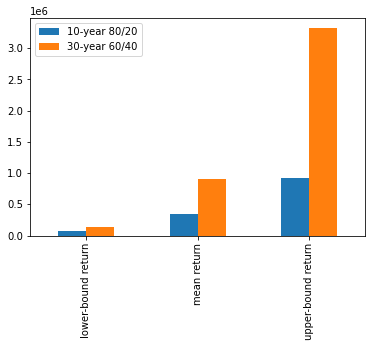

In [177]:
MC_simulations_df.plot.bar()

## Final Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

Note: The figures I mention in this section are from one iteration of the two simulations. Running the simulations again could result in slightly different numbers, but the conclusions remain the same.

While it would be theoretically possible for the credit union members to be able to retire after only ten years, it would be much more risky. While weighting the portfolio more heavily on stocks could possibly yield a 926,765.68 dollars over ten years, that figure is at the upper range of the confidence interval, and therefore could be seen as a best case scenario. Another factor to consider is that the earlier one retires, the longer they are going to have to stretch the money from their retirement portfolio.

Suppose the member is 35 years old. If they retire in 10 years at age 45, and we expect them to live to age 85, they will need that money to last for 40 years, assuming that they will not go back to work. With a mean return of 344,690.27 dollars, that would allow them only 8,617 dollars per year, which is obviously not enough. Even in the best case scenario of making 926,765 dollars, that would still only allow them 23,169 dollars per year. On the other hand, if the member is currently 55 years old and they want to retire in 10 years at age 65, and they expect to live to 85, that would give them a mean 17,234 dollars per year, still not enough, or a best case scenario of 46,338 dollars per year, which while theoretically livable, is still not ideal. Unfortunately, the 55 year old customer is most likely not going to want to retire at age 85, so their options would be more limited than the 35 year old customer.

These findings have emphasized even further to me the importance of planning for retirement early. Additionally, it also demonstrates the importance of having a larger, more diversified portfolio. If all of your investments are distributed between only one stock and one bond, then your options will be much more limited than someone whose assets are distributed amongst several stocks, bonds, real-estate holdings, etc.

In this scenario, I would not advise the credit union members to plan on being able to retire in 10 years. A slightly extended window, such as 15 or 20 years, could be more realistic.

Finally, we also need to take the results of both of these simulations with a sizeable sprinkle of salt, as both simulations are projecting significantly further into the future than the data they are based on. I do not think it would be responsible to present a simulation of 10 to 30 years of returns based on only 3 years of historical data as an accurate prediction. To create a prediction that I would be fully confident presenting to customers in a professional setting, I would have to rerun the 10 and 30 year simulations using at least 10 and 30 years of historical data, respectively. Also I believe the summary statistics of the simulations would be more accurate if at least 1000 simulations were run instead of 500.